In [2]:
## Importing Libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import re    # for regular expressions 
import nltk  # for text manipulation

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [3]:
# Loading Data
df = pd.read_csv("US-Afghan_war_tweets.csv")

In [4]:
# Top 5 Rows of dataset
df.head()

user_location             date  \
0                                   NaN  8/19/2021 23:59   
1                        washington, dc  8/19/2021 23:59   
2                                   NaN  8/19/2021 23:59   
3  midnapore, west bengal, uk outreach   8/19/2021 23:59   
4                         york, england  8/19/2021 23:59   

                                                text sentiment  polarity  \
0    cant recall told troops afghanistan falsely ...  negative    -0.300   
1  shocker afghanistan taliban carrying doorto do...   neutral     0.000   
2     drop bass bombs big homie afghanistan talibans  negative    -0.075   
3  burqa prices risen markets afghanistans provin...  negative    -0.250   
4  uk carved afghanistan s heroin minorities mili...   neutral     0.000   

                      hashtags              source  
0              ['afghanistan']  twitter for iphone  
1              ['afghanistan']    twitter for ipad  
2  ['afghanistan', 'talibans']  twitter for iphone  
3              ['afghanistan']     twitter web app  
4              ['afghanistan']    twitter for ipad

In [5]:
# Last 5 Rows of dataset
df.tail()

user_location             date  \
362561                india  8/16/2021 12:10   
362562                  NaN  8/16/2021 12:09   
362563                earth  8/16/2021 12:09   
362564        mumbai, india  8/16/2021 12:09   
362565  islamabad, pakistan  8/16/2021 12:08   

                                                     text sentiment  polarity  \
362561  war taliban started afghans kabulhasfallen afg...   neutral  0.000000   
362562  words taliban rules women kabulhasfallen https...   neutral  0.000000   
362563  kabulhasfallen afghanistanburning country suff...  negative -0.071429   
362564  kabulhasfallen talibans terrorists deobandi ht...   neutral  0.000000   
362565  the afghans enemies fight fight war oth httpst...   neutral  0.000000   

                                                 hashtags               source  
362561            ['kabulhasfallen', 'afghanistancrisis']      twitter web app  
362562                                 ['kabulhasfallen']  twitter for android  
362563           ['kabulhasfallen', 'afghanistanburning']   twitter for iphone  
362564  ['kabulhasfallen', 'talibans', 'terrorists', '...  twitter for android  
362565                                                NaN  twitter for android

In [6]:
# Checking for Null Values
df.isnull().sum()

user_location    100994
date                  1
text                  1
sentiment             0
polarity              0
hashtags          86361
source                4
dtype: int64

## Unique Value in each feature

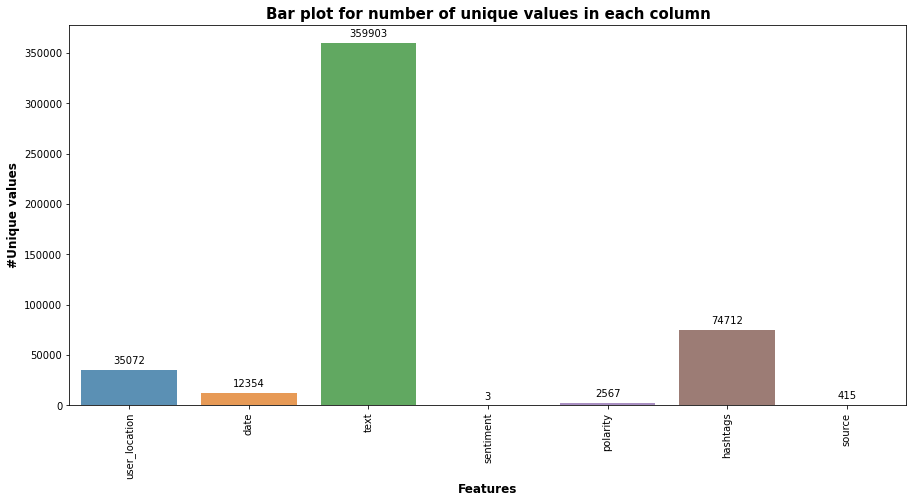

In [7]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

# For label on each bar
splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)

# Assigning X and Y label
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')

# Rotating X label to 90 degress
plt.xticks(rotation=90)

# Showing the bar plot
plt.show()

By looking on unique values we can see that 359903 unique tweets but in dataset there are 362566 tweets. This means there are some duplicates tweets. So we removed those duplicates.

In [8]:
df = df.drop_duplicates(subset=['text'])

Also need to drop one Nan value from text.

In [9]:
df = df.dropna(subset=['text'])

In [10]:
# checking the shape of the dataset
df.shape

(359903, 7)

In [11]:
# Looking for the Null values again
df.isnull().sum()

user_location    99397
date                 0
text                 0
sentiment            0
polarity             0
hashtags         86357
source               3
dtype: int64

# EDA

## Top 10 Location

In [12]:
Top_Location_Of_tweet= df['user_location'].value_counts().head(10)

Top_Location_Of_tweet

india                  11292
pakistan                5824
new delhi, india        4333
islamabad, pakistan     4161
united states           4020
washington, dc          3466
london, england         2972
lahore, pakistan        2524
afghanistan             2332
karachi, pakistan       2317
Name: user_location, dtype: int64

Plot Of Top 10 Locations Of Tweet

In [13]:
import plotly.graph_objects as go

loc_analysis = pd.DataFrame(df['user_location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'user_location':'count'})

data = {
   "values": loc_analysis['count'][:10],
   "labels": loc_analysis.index[:10],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

By looking an plot we can found that major of the tweets were from countries - "India", "pakistan", "USA", "Afganistan" and "England".

## Exploring Sentiments

In [14]:
df['sentiment'].value_counts()

neutral     166329
negative    117349
positive     76225
Name: sentiment, dtype: int64

In [15]:
df['sentiment'].value_counts("neutral")

neutral     0.462150
negative    0.326057
positive    0.211793
Name: sentiment, dtype: float64

<AxesSubplot:>

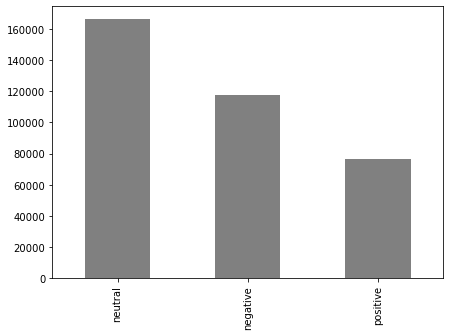

In [16]:
#Bar plot
df['sentiment'].value_counts().plot.bar(color = 'grey', figsize = (7, 5))

In [17]:
# checking out the negative comments from the data

df[df['sentiment'] == 'negative'].head()

user_location             date  \
0                                   NaN  8/19/2021 23:59   
2                                   NaN  8/19/2021 23:59   
3  midnapore, west bengal, uk outreach   8/19/2021 23:59   
6                        washington, dc  8/19/2021 23:59   
9                                  ohio  8/19/2021 23:59   

                                                text sentiment  polarity  \
0    cant recall told troops afghanistan falsely ...  negative    -0.300   
2     drop bass bombs big homie afghanistan talibans  negative    -0.075   
3  burqa prices risen markets afghanistans provin...  negative    -0.250   
6    pakistan closed borders refugees afghanistan...  negative    -0.100   
9    thing think current   administration terribl...  negative    -0.500   

                                  hashtags              source  
0                          ['afghanistan']  twitter for iphone  
2              ['afghanistan', 'talibans']  twitter for iphone  
3                          ['afghanistan']     twitter web app  
6  ['pakistan', 'refugees', 'afghanistan']     twitter web app  
9                                      NaN     twitter web app

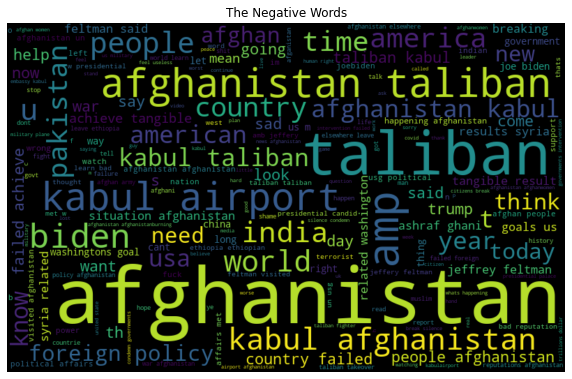

In [18]:
from wordcloud import WordCloud


negative_words =' '.join([text for text in df['text'][df['sentiment'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [19]:
# checking out the Neutral comments from the data set 

df[df['sentiment'] == 'neutral'].head()

user_location             date  \
1                                      washington, dc  8/19/2021 23:59   
4                                       york, england  8/19/2021 23:59   
10                                 powder springs, ga  8/19/2021 23:59   
14  ohio/cali            ã°âââã°âââã°âââã...  8/19/2021 23:58   
17                                                NaN  8/19/2021 23:58   

                                                 text sentiment  polarity  \
1   shocker afghanistan taliban carrying doorto do...   neutral       0.0   
4   uk carved afghanistan s heroin minorities mili...   neutral       0.0   
10  kabul afghanistan internal state department ca...   neutral       0.0   
14  afghanistan goodnews thursdaythoughts techies ...   neutral       0.0   
17    god women amp children  leave let taliban sa...   neutral       0.0   

                                             hashtags              source  
1                                     ['afghanistan']    twitter for ipad  
4                                     ['afghanistan']    twitter for ipad  
10                           ['kabul', 'afghanistan']  twitter for iphone  
14  ['afghanistan', 'goodnews', 'thursdaythoughts'...  twitter for iphone  
17                                        ['taliban']  twitter for iphone

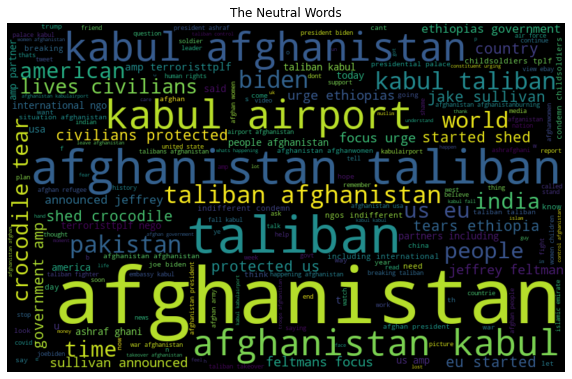

In [20]:
neutral_words =' '.join([text for text in df['text'][df['sentiment'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


In [21]:
# checking out the positive comments from the data set 

df[df['sentiment'] == 'positive'].head()

user_location             date  \
5           new delhi  8/19/2021 23:59   
7   dallas/fort worth  8/19/2021 23:59   
8               world  8/19/2021 23:59   
12             canada  8/19/2021 23:59   
13             london  8/19/2021 23:58   

                                                 text sentiment  polarity  \
5   afghanistan times changed pictures afghan wome...  positive  0.500000   
7   rather drawn political blame game believe far ...  positive  0.025000   
8          admit usarmy right invade httpstcojppyqqgm  positive  0.285714   
12     afghans care ready months   liar  afghanist...  positive  0.200000   
13      israel warned depend more vultures circle ...  positive  0.500000   

                      hashtags               source  
5              ['afghanistan']   twitter for iphone  
7                          NaN   twitter for iphone  
8                   ['usarmy']  twitter for android  
12  ['afghanistan', 'cdnpoli']   twitter for iphone  
13                  ['israel']  twitter for android

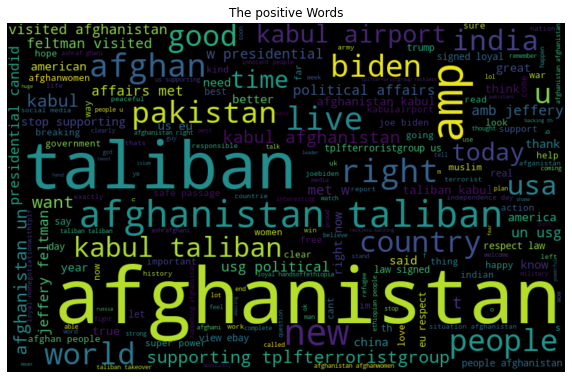

In [22]:
positive_words =' '.join([text for text in df['text'][df['sentiment'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The positive Words')
plt.show()

## Most Occuring words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

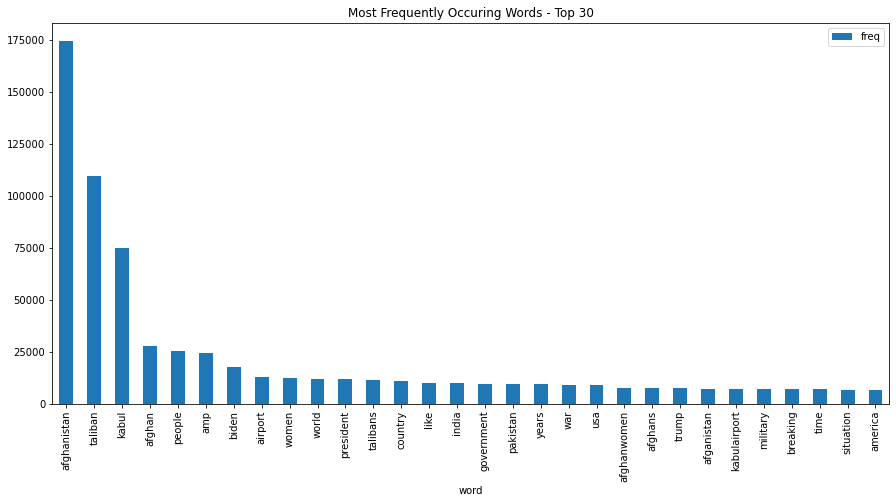

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7) )
plt.title("Most Frequently Occuring Words - Top 30")

## Distribution of Tweets

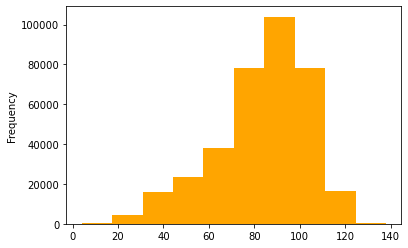

In [24]:
# checking the distribution of tweets in the data

length_df = df['text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

By looking at the distribution it can be found that maximum length of tweets are in the range of 70 words to 110 words.

# Text preprocessing

Assumption - Other features such as **Location, Date and Source are irrelevant** in determining sentiment of tweet. With this assumption all text preprosessing done on **text feature.** 

In [25]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing Punctuations, Numbers, and Special Characters

In [26]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stopwords]

  # joining the list of words with space separator 
  return " ".join(text)

In [27]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt 

In [28]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['text'], '@[\w]*')

# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

## Stemming

In [29]:
from nltk.stem.snowball import SnowballStemmer

In [30]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [31]:
df['Tweet']= df['Tweet'].apply(stemming)

df.head()

user_location             date  \
0                                   NaN  8/19/2021 23:59   
1                        washington, dc  8/19/2021 23:59   
2                                   NaN  8/19/2021 23:59   
3  midnapore, west bengal, uk outreach   8/19/2021 23:59   
4                         york, england  8/19/2021 23:59   

                                                text sentiment  polarity  \
0    cant recall told troops afghanistan falsely ...  negative    -0.300   
1  shocker afghanistan taliban carrying doorto do...   neutral     0.000   
2     drop bass bombs big homie afghanistan talibans  negative    -0.075   
3  burqa prices risen markets afghanistans provin...  negative    -0.250   
4  uk carved afghanistan s heroin minorities mili...   neutral     0.000   

                      hashtags              source  \
0              ['afghanistan']  twitter for iphone   
1              ['afghanistan']    twitter for ipad   
2  ['afghanistan', 'talibans']  twitter for iphone   
3              ['afghanistan']     twitter web app   
4              ['afghanistan']    twitter for ipad   

                                               Tweet  
0  cant recal told troop afghanistan fals claim n...  
1  shocker afghanistan taliban carri doorto door ...  
2        drop bass bomb big homi afghanistan taliban  
3  burqa price risen market afghanistan provinc a...  
4  uk carv afghanistan s heroin minor milit guess...

## Tokenization

In [32]:
# tokenizing the words present in the training set
tokenized_tweet = df['Tweet'].apply(lambda x: x.split()) 

tokenized_tweet.head()

0    [cant, recal, told, troop, afghanistan, fals, ...
1    [shocker, afghanistan, taliban, carri, doorto,...
2    [drop, bass, bomb, big, homi, afghanistan, tal...
3    [burqa, price, risen, market, afghanistan, pro...
4    [uk, carv, afghanistan, s, heroin, minor, mili...
Name: Tweet, dtype: object

Now, next step is word embeddings. Before proceeding towards it lets first create final data set.

In [33]:
final_df = df.drop(["user_location", "date", "text", "source"], axis =1)

In [34]:
final_df.head()

sentiment  polarity                     hashtags  \
0  negative    -0.300              ['afghanistan']   
1   neutral     0.000              ['afghanistan']   
2  negative    -0.075  ['afghanistan', 'talibans']   
3  negative    -0.250              ['afghanistan']   
4   neutral     0.000              ['afghanistan']   

                                               Tweet  
0  cant recal told troop afghanistan fals claim n...  
1  shocker afghanistan taliban carri doorto door ...  
2        drop bass bomb big homi afghanistan taliban  
3  burqa price risen market afghanistan provinc a...  
4  uk carv afghanistan s heroin minor milit guess...

In [35]:
final_df.shape

(359903, 4)

Now there are 3 types of sentiment - **'positive', 'negative', 'neutral'**. As we have to build binary classification model so, we have to **change it into 2 classes only**. To do that here I am merging netral to positive classes.

In [37]:
final_df['sentiment'] = final_df['sentiment'].replace('positive',1)
final_df['sentiment'] = final_df['sentiment'].replace('neutral',1) 
final_df['sentiment'] = final_df['sentiment'].replace('negative',0)

In [38]:
final_df['sentiment'].value_counts()

1    242554
0    117349
Name: sentiment, dtype: int64

In [39]:
#Percentage of Positive/Negative
print("Positive: ", final_df.sentiment.value_counts()[1]/len(final_df)*100,"%")
print("Negative: ", final_df.sentiment.value_counts()[0]/len(final_df)*100,"%")

Positive:  67.39427012278308 %
Negative:  32.605729877216916 %


In [40]:
#split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(final_df['Tweet'],final_df['sentiment'])
#label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
tfidf_vect.fit(final_df['Tweet'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

## Pipeline

In [43]:
tweets_pipeline = Pipeline([('CVec', CountVectorizer(stop_words='english')),
                     ('Tfidf', TfidfTransformer())])

X_train_tranformed = tweets_pipeline.fit_transform(train_x)
X_test_tranformed = tweets_pipeline.transform(valid_x)

In [44]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron

In [45]:
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    'MNB': MultinomialNB(),
    'Perceptron': Perceptron(class_weight='balanced'),
    'xgboost': XGBClassifier(n_estimators=300),
        }

In [46]:
no_classifiers = len(classifiers.keys())

from time import process_time 

def batch_classify(X_train_tranformed, train_y, X_test_tranformed, valid_y, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['Classifier', 'AUC', 'Training time'])
    count = 0
    for key, classifier in classifiers.items():
        t_start = process_time()  
        classifier.fit(X_train_tranformed, train_y)
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        y_predicted = classifier.predict(X_test_tranformed)
        
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'Area Under Curve'] = roc_auc_score(valid_y, y_predicted)
        df_results.loc[count,'Training time'] = t_elapsed
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_elapsed))
        count+=1

    return df_results

## Model Evaluation

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [48]:
df_results = batch_classify(X_train_tranformed, train_y,X_test_tranformed, valid_y)
print(df_results.sort_values(by='Area Under Curve', ascending=False))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained Logistic Regression in 21.33 s
trained MNB in 0.08 s
trained Perceptron in 1.17 s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trained xgboost in 705.42 s
            Classifier  AUC  Training time  Area Under Curve
0  Logistic Regression  0.0      21.328125          0.757783
3              xgboost  0.0     705.421875          0.746401
2           Perceptron  0.0       1.171875          0.705802
1                  MNB  0.0       0.078125          0.588304


From above result it can be said that Logistic Regression works best of all followed by xgboost

## Future Scope

  1) I only implemented ML models here but there will be scope of Deep Learning models such as LSTM, BERT etc. which may perform well than ML models.
  
  2) By hypertuning there may be chance that performance of model increase.
  
  3) In word Embedding Technique I applied countvectorizer and TF-idf but if computational issue not there then I can implement word2vec. Word2vec might perform better than these.

## Challanges - 

1) Computational issue in my local system
2) Lots of missing value in location as well as in many location field data contains special character